In [2]:
pip install matplotlib numpy pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
5,0,3,1,24.0,0,0,8.4583,1,0
6,0,1,1,54.0,0,0,51.8625,0,1
7,0,3,1,2.0,3,1,21.0750,0,1
8,1,3,0,27.0,0,2,11.1333,0,1
9,1,2,0,14.0,1,0,30.0708,0,0


In [16]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


C:\Users\cd347\AppData\Local\Temp\ipykernel_6408\782659820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\cd347\AppData\Local\Temp\ipykernel_6408\782659820.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


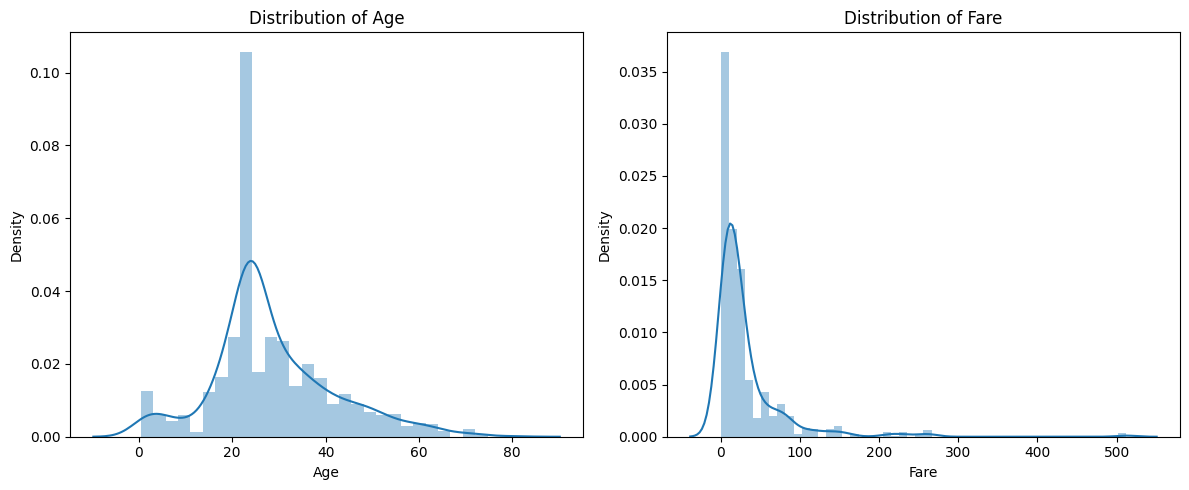

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
sns.distplot(df['Fare'])
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [26]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
IQR = q3 - q1
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
n_df = df[df["Age"] <= max_range]
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)
IQR = q3 - q1
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
n_d_Fare = df[df["Fare"] <= max_range]

In [27]:
n_df.shape , n_d_Fare.shape

((849, 9), (775, 9))

C:\Users\cd347\AppData\Local\Temp\ipykernel_6408\1478197632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_df['Age'])
C:\Users\cd347\AppData\Local\Temp\ipykernel_6408\1478197632.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_d_Fare['Fare'])


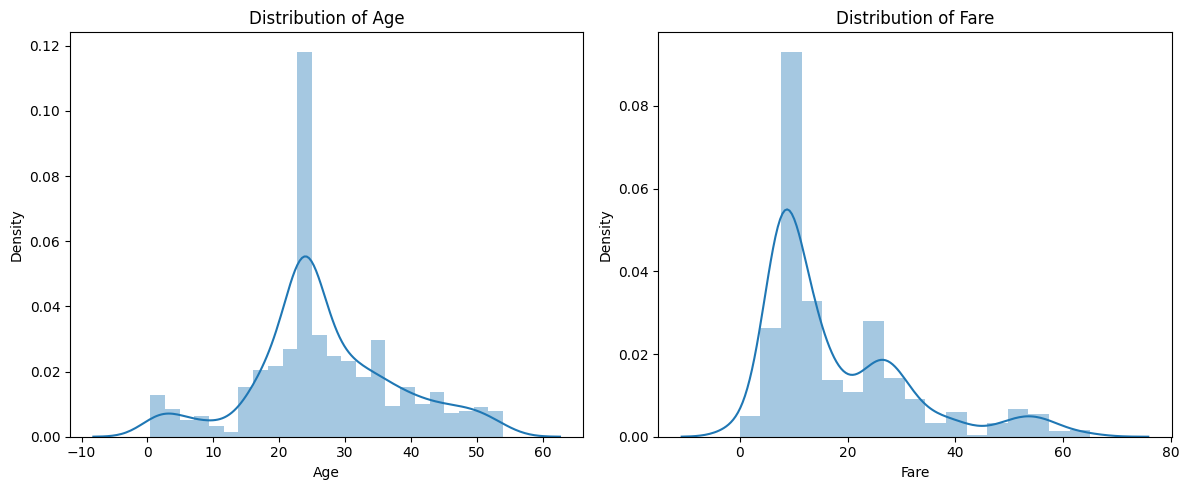

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(n_df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
sns.distplot(n_d_Fare['Fare'])
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

In [29]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,-0.497793,0.432793,-0.473674,-0.502445,0,1
1,1,1,0,0.715048,0.432793,-0.473674,0.786845,0,0
2,1,3,0,-0.194583,-0.474545,-0.473674,-0.488854,0,1
